# Analysis

1. Treatment with Capomulin reduced the average volume of tumors over time.
2. Treatment with Infubinol or Ketapril did not have a significant impact on tumor volume compared to the placebo.
3. Treatment with Capomulin reduced the spread of metastatic sites and extended the life of mice undergoing this treatment.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from math import trunc

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
trial_data = pd.merge(clinical_trial_df, mouse_drug_df,on ="Mouse ID",how='outer')

# Display the data table for preview
trial_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_data = trial_data.groupby(["Drug", "Timepoint"])
volume_mean = group_data["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
volume_mean_df = pd.DataFrame(volume_mean)
volume_mean_df = volume_mean_df.reset_index()

# Preview DataFrame
volume_mean_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_err = group_data["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
standard_err_df = pd.DataFrame(standard_err)
standard_err_df = standard_err_df.reset_index()

# Preview DataFrame
standard_err_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
data_table = volume_mean_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
standard_err_table = standard_err_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
data_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


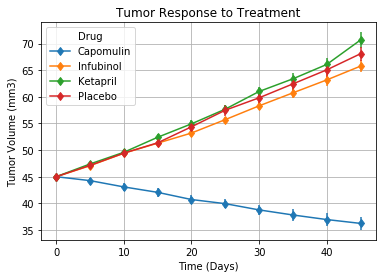

In [5]:
# Generate the Plot (with Error Bars)
data_table_select = data_table[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
standard_err_select = standard_err_table[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
markers = "d"
data_table_select.plot(grid=True, marker=markers, yerr=standard_err_select)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

# Save the Figure
plt.savefig("Graphs/TumorVolume.png")

plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = group_data["Metastatic Sites"].mean()

# Convert to DataFrame
mean_met_df = pd.DataFrame(mean_met)
mean_met_df = mean_met_df.reset_index()
# Preview DataFrame
mean_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mean_err = group_data["Metastatic Sites"].sem()

# Convert to DataFrame
mean_err_df = pd.DataFrame(mean_err)
mean_err_df = mean_err_df.reset_index()

# Preview DataFrame
mean_err_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
data_table_met = mean_met_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
standard_err_table_met = mean_err_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked
data_table_met.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


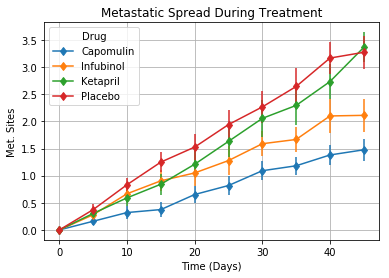

In [10]:
# Generate the Plot (with Error Bars)
data_table_select_met = data_table_met[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
standard_err_select_met = standard_err_table_met[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
data_table_select_met.plot(grid=True, marker=markers, yerr=standard_err_select_met)
plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")

# Save the Figure
plt.savefig("Graphs/MetSites.png")

# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
trial_data_reset = trial_data.reset_index()
group_data_mouse = trial_data_reset.groupby(["Drug", "Timepoint"])
mouse_count = group_data_mouse["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)
mouse_count_df = mouse_count_df.reset_index()
# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
data_table_mouse_count = mouse_count_df.pivot(index="Timepoint", columns="Drug", values="Mouse ID")

# Preview the Data Frame
data_table_mouse_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


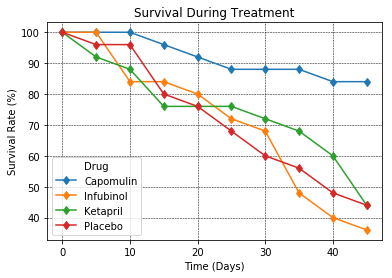

In [19]:
# Generate the Plot (Accounting for percentages)
data_table_mouse_percentage = data_table_mouse_count / 25 * 100
data_table_mouse_percentage = data_table_mouse_percentage[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
data_table_mouse_percentage.plot(grid=True, marker="d")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")

# Save the Figure
plt.gcf()
plt.savefig("Graphs/SurvivalRates.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

percent_change = (((data_table.iloc[-1]-data_table.iloc[0])/data_table.iloc[0])*100).to_frame("% Change")
percent_change = percent_change.loc[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Display the data to confirm
percent_change

,% Change
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


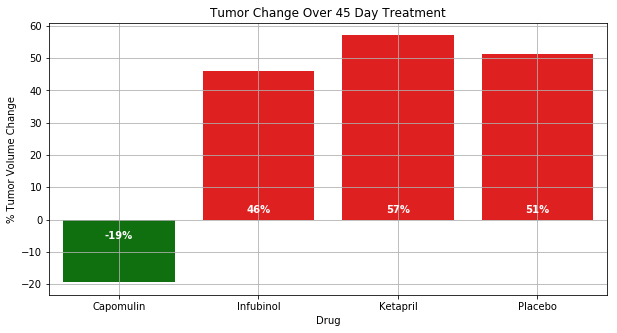

In [15]:
x = percent_change.index
y = percent_change['% Change']
plt.figure(figsize=(10,5))
colors = ['red' if _y >= 0 else 'green' for _y in y]
ax = sn.barplot(x,y, palette=colors)
for n, (label, _y) in enumerate(zip(x, y)):
    if _y <= 0:
        ax.annotate(
            s='{:d}%'.format(trunc(_y)), xy=(n, -8), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')
    else:
        ax.annotate(
            s='{:d}%'.format(trunc(_y)), xy=(n, 0), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')

plt.gca().set(xlabel='Drug', ylabel='% Tumor Volume Change', title='Tumor Change Over 45 Day Treatment')
plt.rc('grid', linestyle="--", color='black', linewidth=0.5)
plt.grid(True)


# Save the Figure
plt.savefig("Graphs/TumorChange.png")

# Show the Figure
plt.show()